In [1]:
ls

__notebook__.ipynb


In [2]:
!wget http://data.vision.ee.ethz.ch/ihnatova/camera_scene_detection_train.zip

--2021-02-27 11:13:20--  http://data.vision.ee.ethz.ch/ihnatova/camera_scene_detection_train.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/ihnatova/camera_scene_detection_train.zip [following]
--2021-02-27 11:13:20--  https://data.vision.ee.ethz.ch/ihnatova/camera_scene_detection_train.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333074849 (318M) [application/zip]
Saving to: ‘camera_scene_detection_train.zip’

camera_scene_detect 100%[===================>] 317.64M  26.9MB/s    in 13s     

2021-02-27 11:13:34 (24.8 MB/s) - ‘camera_scene_detection_train.zip’ saved [333074849/333074849]



In [3]:
!unzip  camera_scene_detection_train.zip

Archive:  camera_scene_detection_train.zip
   creating: training/
   creating: training/10_Waterfall/
  inflating: training/10_Waterfall/0.jpg  
  inflating: training/10_Waterfall/1.jpg  
  inflating: training/10_Waterfall/10.jpg  
  inflating: training/10_Waterfall/100.jpg  
  inflating: training/10_Waterfall/101.jpg  
  inflating: training/10_Waterfall/102.jpg  
  inflating: training/10_Waterfall/103.jpg  
  inflating: training/10_Waterfall/104.jpg  
  inflating: training/10_Waterfall/105.jpg  
  inflating: training/10_Waterfall/106.jpg  
  inflating: training/10_Waterfall/107.jpg  
  inflating: training/10_Waterfall/108.jpg  
  inflating: training/10_Waterfall/109.jpg  
  inflating: training/10_Waterfall/11.jpg  
  inflating: training/10_Waterfall/110.jpg  
  inflating: training/10_Waterfall/111.jpg  
  inflating: training/10_Waterfall/112.jpg  
  inflating: training/10_Waterfall/113.jpg  
  inflating: training/10_Waterfall/114.jpg  
  inflating: training/10_Waterfall/115.jpg  
  in

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as matimg
import seaborn as sns
import os, random,cv2, json, itertools

from IPython.display import SVG
from tensorflow.keras.utils import plot_model, model_to_dot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Add, Input, Conv2D, Dropout, Activation, BatchNormalization, 
                                    MaxPooling2D, ZeroPadding2D, AveragePooling2D, Flatten, Dense)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import *

# from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
# from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [5]:
print(os.listdir("./training"))

['20_Flower', '27_Backlight', '3_Kids', '14_Architecture', '7_Food', '18_Greenery', '29_QR_images', '19_Autumn_leaves', '15_Sunset_Sunrise', '24_Candle_light', '2_Group_portrait', '17_Cloudy_Sky', '28_Text_Documents', '6_Macro', '30_Computer_Screens', '12_Landscape', '11_Snow', '4_Dog', '25_Neon_lights', '22_Stage_concert', '9_Mountain', '10_Waterfall', '21_Night_shot', '16_Blue_Sky', '8_Beach', '13_Underwater', '5_Cat', '26_Indoor', '1_Portrait', '23_Fireworks']


In [6]:
train_dir = "./training/"

In [7]:
# def load_unique():    
#     size_img = 576,384 
#     images_for_plot = []
#     labels_for_plot = []
#     for folder in os.listdir(train_dir):
#         for file in os.listdir(train_dir + '/' + folder):
#             filepath = train_dir + '/' + folder + '/' + file
#             image = matimg.imread(filepath)
#             images_for_plot.append(image)
#             labels_for_plot.append(folder)
#             break
#     return images_for_plot, labels_for_plot

# images_for_plot, labels_for_plot = load_unique()
# print("unique_labels = ", labels_for_plot)

# fig = plt.figure(figsize = (15,15))
# def plot_images(fig, image, label, row, col, index):
#     fig.add_subplot(row, col, index)
#     plt.axis('off')
#     plt.imshow(image)
#     plt.title(label)
#     return

# image_index = 0
# row = 5
# col = 6
# for i in range(1,(row*col)):
#     plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
#     image_index = image_index + 1
# plt.show()

In [8]:
# labels_dict = {
#     '1_Portrait':0,
#     '2_Group_portrait':1,
#     '3_Kids':2,
#     '4_Dog':3,
#     '5_Cat':4,
#     '6_Macro':5,
#     '7_Food':6,
#     '8_Beach':7,
#     '9_Mountain':8,
#     '10_Waterfall':9,
#     '11_Snow':10,
#     '12_Landscape':11,
#     '13_Underwater':12,
#     '14_Architecture':13,
#     '15_Sunset_Sunrise':14,
#     '16_Blue_Sky':15,
#     '17_Cloudy_Sky':16,
#     '18_Greenery':17,
#     '19_Autumn_leaves':18,
#     '20_Flower':19,
#     '21_Night_shot':20,
#     '22_Stage_concert':21,
#     '23_Fireworks':22,
#     '24_Candle_light':23,
#     '25_Neon_lights':24,
#     '26_Indoor':25,
#     '27_Backlight':26,
#     '28_Text_Documents':27,
#     '29_QR_images':28,
#     '30_Computer_Screens':29
# }


# def load_data():
#     """
#     Loads data and preprocess. Returns train and test data along with labels.
#     """
#     images = []
#     labels = []
#     size = 384,576
#     print("LOADING DATA FROM : ",end = "")
#     for folder in os.listdir(train_dir):
#         print(folder, end = ' | ')
#         for image in os.listdir(train_dir + "/" + folder):
#             temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
#             temp_img = cv2.resize(temp_img, size)
#             images.append(temp_img)
#             labels.append(labels_dict[folder])
    
#     images = np.array(images)
#     images = images.astype('float32')/255.0
    
#     labels = keras.utils.to_categorical(labels)
    
#     X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.08)
    
#     print()
#     print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
#     print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
#     return X_train, X_test, Y_train, Y_test

# X_train, X_test, y_train, y_test = load_data()

In [9]:
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []
        

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('Log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="acc")
        ax2.plot(self.x, self.val_acc, label="val_acc")
        ax2.legend()
        
        plt.show()
        
        
plot = PlotLearning()

In [10]:
target_size = (224, 224)
target_dims = (224, 224, 3) # add channel for RGB
n_classes = 30
val_frac = 0.09
batch_size = 128

data_augmentor = ImageDataGenerator(
    validation_split=val_frac,
    rotation_range=0.2,
    zoom_range=0.4,
    channel_shift_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=False, 
    rescale=1./255,
    data_format='channels_last', 
)

train_generator = data_augmentor.flow_from_directory(train_dir, target_size=target_size, batch_size=batch_size, shuffle=True, subset="training")
val_generator = data_augmentor.flow_from_directory(train_dir, target_size=target_size, batch_size=batch_size, subset="validation")

Found 9020 images belonging to 30 classes.
Found 877 images belonging to 30 classes.


In [11]:
model_1 = MobileNetV2(weights="imagenet",include_top=False,input_shape=(224,224,3))

for layer in model_1.layers:
    layer.trainable = False

model_1.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
________________

In [12]:
headModel = model_1.output

headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name="flatten")(headModel)

headModel = Dense(256,activation="relu")(headModel)

headModel = Dropout(0.5)(headModel)

headModel = Dense(n_classes, activation="softmax")(headModel)

model_2 = Model(inputs=model_1.input, outputs=headModel)

model_2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [13]:
opt_2 = Adam(lr=1e-4)
model_2.compile(loss="categorical_crossentropy",optimizer=opt_2,metrics=['accuracy'])

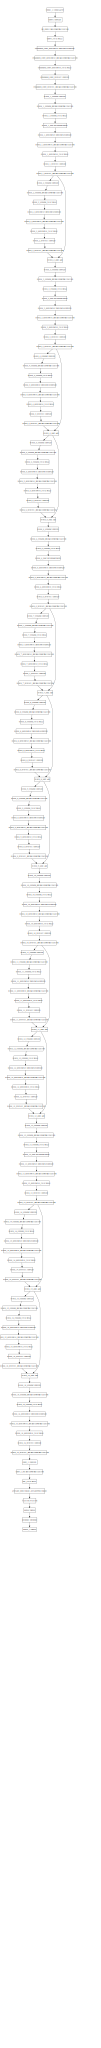

In [14]:
plot_model(model_2,to_file='MobileNetV2_transfer_model.png',show_shapes=True,show_layer_names=True)
SVG(model_to_dot(model_2).create(prog='dot',format='svg'))

In [15]:
epochs = 125
batchSize = 128

In [16]:
MobileNet_checkpoint = ModelCheckpoint("model_weight.h5", monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
MobileNet_logs = TensorBoard("MobileNet-transfer-logs")

In [17]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.950):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True
        
callback = myCallback()

In [18]:
history = model_2.fit(train_generator,
                      epochs=epochs,
                      verbose=4,
                      batch_size=128,
                      validation_data=val_generator,
                      callbacks =[callback]
                     )

Epoch 1/125
Epoch 2/125
Epoch 3/125
Epoch 4/125
Epoch 5/125
Epoch 6/125
Epoch 7/125
Epoch 8/125
Epoch 9/125
Epoch 10/125
Epoch 11/125
Epoch 12/125
Epoch 13/125
Epoch 14/125
Epoch 15/125
Epoch 16/125
Epoch 17/125
Epoch 18/125
Epoch 19/125
Epoch 20/125
Epoch 21/125
Epoch 22/125
Epoch 23/125
Epoch 24/125
Epoch 25/125
Epoch 26/125
Epoch 27/125
Epoch 28/125
Epoch 29/125
Epoch 30/125
Epoch 31/125
Epoch 32/125
Epoch 33/125
Epoch 34/125
Epoch 35/125
Epoch 36/125
Epoch 37/125
Epoch 38/125
Epoch 39/125
Epoch 40/125
Epoch 41/125
Epoch 42/125
Epoch 43/125
Epoch 44/125
Epoch 45/125
Epoch 46/125
Epoch 47/125
Epoch 48/125
Epoch 49/125
Epoch 50/125
Epoch 51/125
Epoch 52/125
Epoch 53/125
Epoch 54/125
Epoch 55/125
Epoch 56/125
Epoch 57/125
Epoch 58/125
Epoch 59/125
Epoch 60/125
Epoch 61/125
Epoch 62/125
Epoch 63/125
Epoch 64/125
Epoch 65/125
Epoch 66/125
Epoch 67/125
Epoch 68/125
Epoch 69/125
Epoch 70/125
Epoch 71/125
Epoch 72/125
Epoch 73/125
Epoch 74/125
Epoch 75/125
Epoch 76/125
Epoch 77/125
Epoch 78

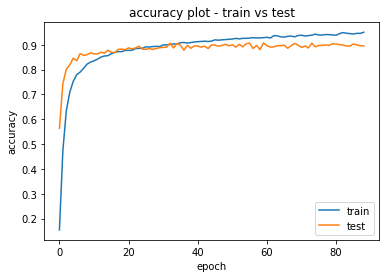

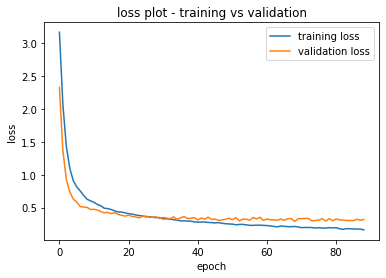

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [20]:
model.save('model.h5')

NameError: name 'model' is not defined